In [159]:
adj_list_1 = {
    0: [1, 2],
    1: [0, 2],
    2: [0, 1],
    3: [4, 5],
    4: [3, 5],
    5: [3, 4]
}


In [160]:
adj_list_2 = {
    0: [1, 2, 6],
    1: [0, 2, 7],
    2: [0, 1, 8],
    3: [4, 5, 6],
    4: [3, 5, 7],
    5: [3, 4, 8],
    6: [0, 3, 7],  # bridge between first and second cluster
    7: [1, 4, 6, 8],
    8: [2, 5, 7]
}


In [161]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

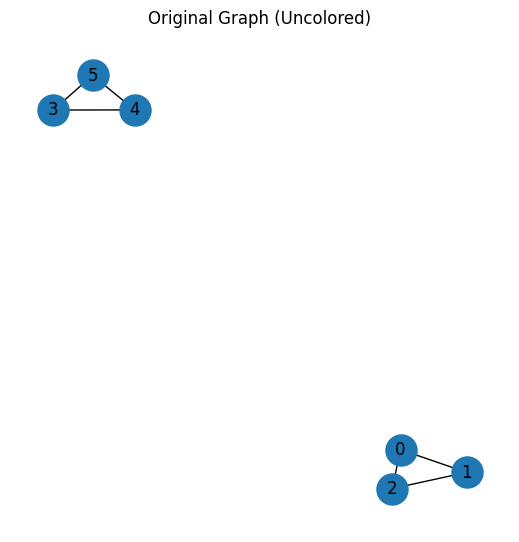

In [162]:
G = nx.Graph(adj_list)

# Layout
pos = nx.spring_layout(G, seed=42)

# Plot without colors (default is light blue nodes)
plt.figure(figsize=(5,5))
nx.draw(G, pos, with_labels=True, node_size=500, font_color='black')
plt.title("Original Graph (Uncolored)")
plt.show()

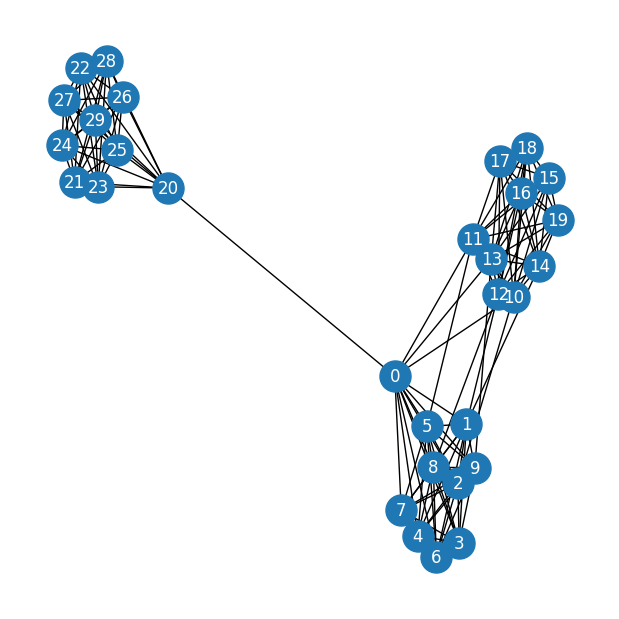

In [203]:
# Adjacency list for the SBM with 3 partitions (10 nodes each)
adj_list_4 = {
    0:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 13],
    1:  [0, 2, 3, 4, 5, 6, 7, 8, 9, 12, 14],
    2:  [0, 1, 3, 4, 5, 6, 7, 8, 9, 10],
    3:  [0, 1, 2, 4, 5, 6, 7, 8, 9],
    4:  [0, 1, 2, 3, 5, 6, 7, 8, 9],
    5:  [0, 1, 2, 3, 4, 6, 7, 8, 9, 11],
    6:  [0, 1, 2, 3, 4, 5, 7, 8, 9],
    7:  [0, 1, 2, 3, 4, 5, 6, 8, 9],
    8:  [0, 1, 2, 3, 4, 5, 6, 7, 9, 12],
    9:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 13],
    
    10: [2, 11, 12, 13, 14, 15, 16, 17, 18, 19, 0],
    11: [5, 10, 12, 13, 14, 15, 16, 17, 18, 19],
    12: [1, 8, 10, 11, 13, 14, 15, 16, 17, 18],
    13: [0, 9, 10, 11, 12, 14, 15, 16, 17, 18],
    14: [1, 10, 11, 12, 13, 15, 16, 17, 18, 19],
    15: [10, 11, 12, 13, 14, 16, 17, 18, 19],
    16: [10, 11, 12, 13, 14, 15, 17, 18, 19],
    17: [10, 11, 12, 13, 14, 15, 16, 18, 19],
    18: [10, 11, 12, 13, 14, 15, 16, 17, 19],
    19: [10, 11, 12, 13, 14, 15, 16, 17, 18],
    
    20: [21, 22, 23, 24, 25, 26, 27, 28, 29, 0],
    21: [20, 22, 23, 24, 25, 26, 27, 28, 29],
    22: [20, 21, 23, 24, 25, 26, 27, 28, 29],
    23: [20, 21, 22, 24, 25, 26, 27, 28, 29],
    24: [20, 21, 22, 23, 25, 26, 27, 28, 29],
    25: [20, 21, 22, 23, 24, 26, 27, 28, 29],
    26: [20, 21, 22, 23, 24, 25, 27, 28, 29],
    27: [20, 21, 22, 23, 24, 25, 26, 28, 29],
    28: [20, 21, 22, 23, 24, 25, 26, 27, 29],
    29: [20, 21, 22, 23, 24, 25, 26, 27, 28],
}

G = nx.Graph(adj_list_4)
plt.figure(figsize=(6,6))
nx.draw(G, with_labels=True, node_size=500, font_color='white')
plt.show()

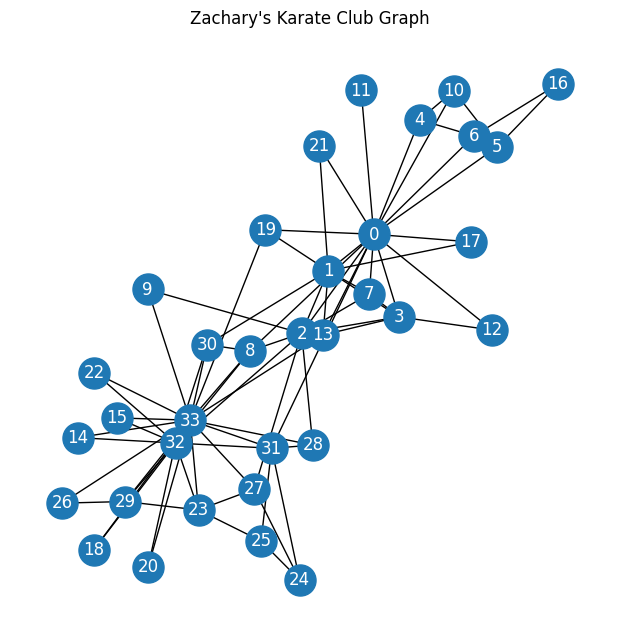

{0: [1, 2], 1: [0, 2], 2: [0, 1], 3: [4, 5], 4: [3, 5], 5: [3, 4]}


In [163]:
import networkx as nx
import matplotlib.pyplot as plt

# Load the classic karate club graph
G = nx.karate_club_graph()

# Plot it
plt.figure(figsize=(6,6))
nx.draw(G, with_labels=True, node_size=500, font_color='white')
plt.title("Zachary's Karate Club Graph")
plt.show()

# Get adjacency list as a Python dict
adj_list_k = {node: list(G.neighbors(node)) for node in G.nodes()}
print(adj_list)


## Start 

In [202]:
a = int(input("1 for already partitioned, 2 for random from GPT, 3 for karate club, 4 for 3 clusters"))

adj = {1:adj_list_1, 2:adj_list_2, 3:adj_list_k, 4:adj_list_4}

adj_list = adj[a]

1 for already partitioned, 2 for random from GPT, 3 for karate club, 4 for 3 clusters 4


In [204]:
adj_list


{0: [1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 13],
 1: [0, 2, 3, 4, 5, 6, 7, 8, 9, 12, 14],
 2: [0, 1, 3, 4, 5, 6, 7, 8, 9, 10],
 3: [0, 1, 2, 4, 5, 6, 7, 8, 9],
 4: [0, 1, 2, 3, 5, 6, 7, 8, 9],
 5: [0, 1, 2, 3, 4, 6, 7, 8, 9, 11],
 6: [0, 1, 2, 3, 4, 5, 7, 8, 9],
 7: [0, 1, 2, 3, 4, 5, 6, 8, 9],
 8: [0, 1, 2, 3, 4, 5, 6, 7, 9, 12],
 9: [0, 1, 2, 3, 4, 5, 6, 7, 8, 13],
 10: [2, 11, 12, 13, 14, 15, 16, 17, 18, 19, 0],
 11: [5, 10, 12, 13, 14, 15, 16, 17, 18, 19],
 12: [1, 8, 10, 11, 13, 14, 15, 16, 17, 18],
 13: [0, 9, 10, 11, 12, 14, 15, 16, 17, 18],
 14: [1, 10, 11, 12, 13, 15, 16, 17, 18, 19],
 15: [10, 11, 12, 13, 14, 16, 17, 18, 19],
 16: [10, 11, 12, 13, 14, 15, 17, 18, 19],
 17: [10, 11, 12, 13, 14, 15, 16, 18, 19],
 18: [10, 11, 12, 13, 14, 15, 16, 17, 19],
 19: [10, 11, 12, 13, 14, 15, 16, 17, 18],
 20: [21, 22, 23, 24, 25, 26, 27, 28, 29, 0],
 21: [20, 22, 23, 24, 25, 26, 27, 28, 29],
 22: [20, 21, 23, 24, 25, 26, 27, 28, 29],
 23: [20, 21, 22, 24, 25, 26, 27, 28, 29],
 24: [20, 21, 22,

In [205]:
def make_adj_mat(adj_list):
    n = len(adj_list)
    adj_mat = np.zeros((n,n), dtype = int)
    degree_mat = np.zeros((n,n), dtype = int)
    for key, val in adj_list.items():
        for value in val:
            adj_mat[key][value] = 1
        degree_mat[key][key] = len(val)


    return adj_mat, degree_mat

In [206]:
A,D = make_adj_mat(adj_list)

In [207]:
D

array([[11,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 11,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  9,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  9,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  9,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  9,  

In [208]:
L = D-A

In [209]:
L

array([[11, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0, -1,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [-1, 11, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0, -1,  0, -1,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [-1, -1, 10, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [-1, -1, -1,  9, -1, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [-1, -1, -1, -1,  9, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [-1, -1, -1, -1, -1, 10, -1, -1, -1, -1,  0, -1,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [-1, -1, -1, -1, -1, -1,  9, -1, -1, -1,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [-1, -1, -1, -1, -1, -1, -1,  9, -

In [219]:
eigval, eigvectors = np.linalg.eigh(L)
idx = eigval.argsort() # sort by eigenvalues

In [220]:
e2 = eigvectors[:, idx][:, 1] # get 2nd eigenvector

In [221]:
e2

array([-0.02877366, -0.05246382, -0.04977366, -0.04780833, -0.04780833,
       -0.05011708, -0.04780833, -0.04780833, -0.05056244, -0.05036134,
       -0.06922972, -0.07297292, -0.07782713, -0.0756352 , -0.07318822,
       -0.07528167, -0.07528167, -0.07528167, -0.07528167, -0.07528167,
        0.27575407,  0.30651556,  0.30651556,  0.30651556,  0.30651556,
        0.30651556,  0.30651556,  0.30651556,  0.30651556,  0.30651556])

In [222]:
partitions = {0:[], 1:[]}

for i, val in enumerate(e2):
    if val<0:
        partitions[0].append(i)
    else:
         partitions[1].append(i)
        

In [223]:
partitions

{0: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 1: [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]}

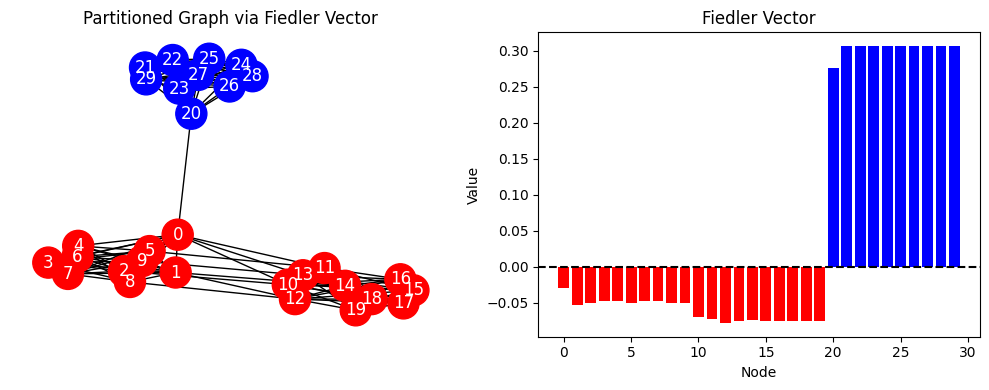

In [224]:
# Plot graph
G = nx.Graph(adj_list)
colors = ['red' if node in partitions[0] else 'blue' for node in G.nodes()]
pos = nx.spring_layout(G, seed=42)

plt.figure(figsize=(10,4))

# Left: partitioned graph
plt.subplot(1, 2, 1)
nx.draw(G, pos, with_labels=True, node_color=colors, node_size=500, font_color='white')
plt.title("Partitioned Graph via Fiedler Vector")

# Right: Fiedler vector plot
plt.subplot(1, 2, 2)
plt.bar(range(len(e2)), e2, color=['red' if val < 0 else 'blue' for val in e2])
plt.axhline(0, color='black', linestyle='--')
plt.title("Fiedler Vector")
plt.xlabel("Node")
plt.ylabel("Value")

plt.tight_layout()
plt.show()

In [225]:
_vects_2_3_4 = eigvectors[:, idx][:, 1:4] # get 2, 3, 4 eigenvectors

In [226]:
_vects_2_3_4

array([[-0.02877366,  0.18822585,  0.38926079],
       [-0.05246382,  0.18405038, -0.24503821],
       [-0.04977366,  0.22476937,  0.12554173],
       [-0.04780833,  0.26839157, -0.07180476],
       [-0.04780833,  0.26839157, -0.07180476],
       [-0.05011708,  0.22108828, -0.05137692],
       [-0.04780833,  0.26839157, -0.07180476],
       [-0.04780833,  0.26839157, -0.07180476],
       [-0.05056244,  0.22306102, -0.29148963],
       [-0.05036134,  0.22310577,  0.33005934],
       [-0.06922972, -0.15520862,  0.20871294],
       [-0.07297292, -0.19095446, -0.04276766],
       [-0.07782713, -0.17179786, -0.38407529],
       [-0.0756352 , -0.17136326,  0.49942401],
       [-0.07318822, -0.19476861, -0.17900996],
       [-0.07528167, -0.23825775, -0.02233982],
       [-0.07528167, -0.23825775, -0.02233982],
       [-0.07528167, -0.23825775, -0.02233982],
       [-0.07528167, -0.23825775, -0.02233982],
       [-0.07528167, -0.23825775, -0.02233982],
       [ 0.27575407,  0.00472744,  0.264

In [227]:
from sklearn.cluster import KMeans

X = _vects_2_3_4

kmeans = KMeans(n_clusters = 3, n_init = 10, random_state = 0)
labels = kmeans.fit_predict(X)

In [228]:
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

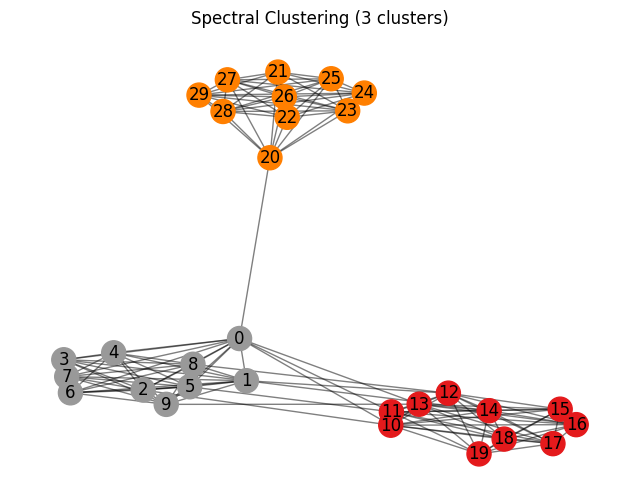

In [229]:
G = nx.Graph()
for node, neighbors in adj_list.items():
    for neighbor in neighbors:
        G.add_edge(node, neighbor)

pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(8, 6))
nx.draw_networkx_nodes(G, pos, node_color=labels, cmap=plt.cm.Set1, node_size=300)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos)
plt.title("Spectral Clustering (3 clusters)")
plt.axis("off")
plt.show()